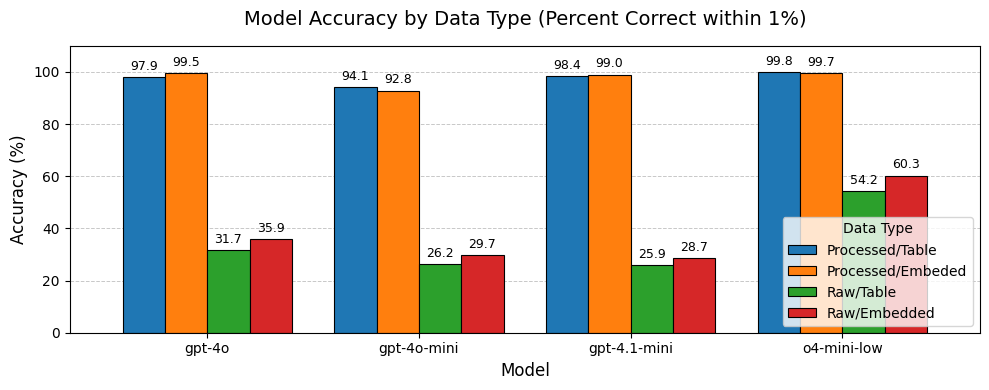

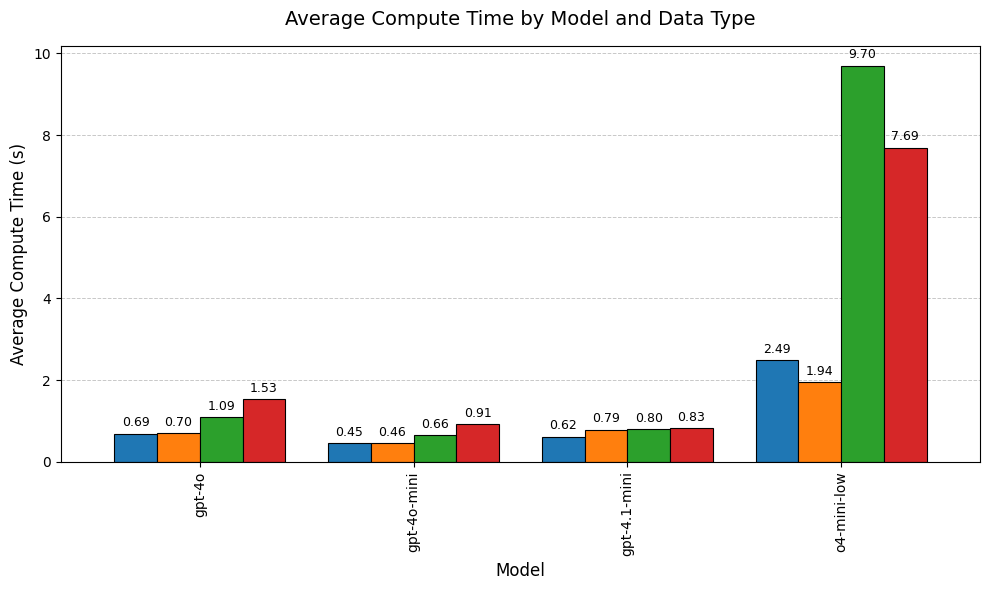

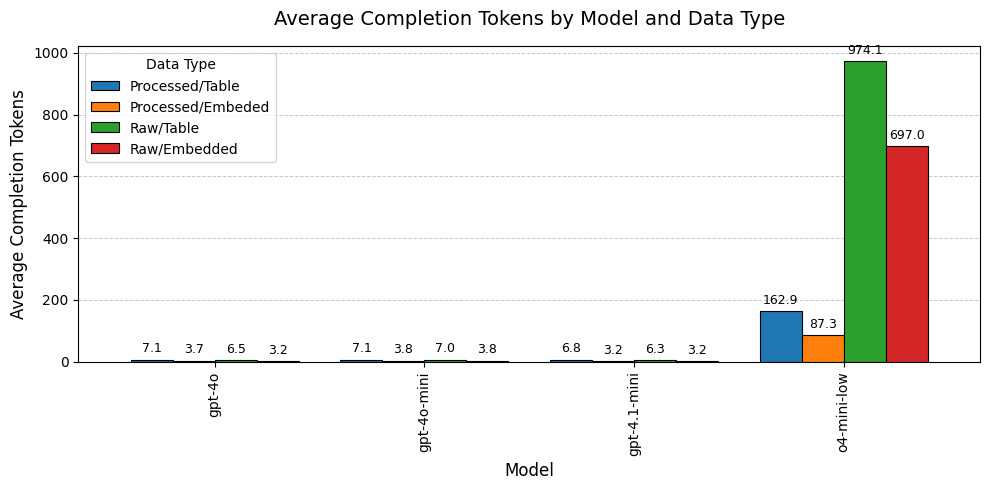

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define full set of models and data types
# models = ["gpt-4o", "gpt-4o-mini", "gpt-4.1", "gpt-4.1-mini", "o4-mini-low"]
models = ["gpt-4o", "gpt-4o-mini", "gpt-4.1-mini", "o4-mini-low"]
data_types = ["Processed/Table", "Processed/Embeded", "Raw/Table", "Raw/Embedded"]

# 2. Load data (adjust path if needed)
df = pd.read_csv('../experiments.csv')  # update to your filepath

# 3. Drop rows with empty 'response'
df = df[df['response'].notna() & (df['response'] != '')]

# 4. Cast relevant columns to numeric and drop NaNs
df['response']         = pd.to_numeric(df['response'], errors='coerce')
df['ground_truth']     = pd.to_numeric(df['ground_truth'], errors='coerce')
df['compute_time']     = pd.to_numeric(df['compute_time'], errors='coerce')
df['completion_tokens']= pd.to_numeric(df['completion_tokens'], errors='coerce')
df = df.dropna(subset=['response', 'ground_truth', 'compute_time', 'completion_tokens'])

# 5. Compute accuracy flag (within 1%)
df['correct'] = (abs(df['response'] - df['ground_truth']) / df['ground_truth']) <= 0.01

# 6a. Pivot average accuracy (%) by Model × Data_Type
acc = (
    df.groupby(['Model', 'Data_Type'])['correct']
      .mean()
      .unstack(fill_value=0)
      .reindex(index=models, columns=data_types, fill_value=0)
    * 100
)

# 6b. Pivot average compute time by Model × Data_Type
tme = (
    df.groupby(['Model', 'Data_Type'])['compute_time']
      .mean()
      .unstack(fill_value=0)
      .reindex(index=models, columns=data_types, fill_value=0)
)

# 6c. Pivot average total tokens by Model × Data_Type
tkns = (
    df.groupby(['Model', 'Data_Type'])['completion_tokens']
      .mean()
      .unstack(fill_value=0)
      .reindex(index=models, columns=data_types, fill_value=0)
)

# 7a. Plot grouped bar chart for accuracy (no legend)
fig, ax = plt.subplots(figsize=(10, 4))
acc.plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.8,
    width=0.8,
    legend=False,
    ax=ax
)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Model Accuracy by Data Type (Percent Correct within 1%)', fontsize=14, pad=15)
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)
ax.set_ylim(0, 110)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.legend(title='Data Type', loc='lower right', frameon=True)



# Annotate each bar with its value
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(
            f'{h:.1f}',
            (p.get_x() + p.get_width() / 2, h),
            ha='center', va='bottom',
            fontsize=9,
            xytext=(0, 3), textcoords='offset points'
        )
plt.tight_layout()

# 7b. Plot grouped bar chart for compute time
fig, ax = plt.subplots(figsize=(10, 6))
tme.plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.8,
    width=0.8,
    legend=False,
    ax=ax
)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Average Compute Time (s)', fontsize=12)
ax.set_title('Average Compute Time by Model and Data Type', fontsize=14, pad=15)
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)
# ax.legend(title='Data Type', loc='upper left', frameon=True)

for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(
            f'{h:.2f}',
            (p.get_x() + p.get_width() / 2, h),
            ha='center', va='bottom',
            fontsize=9,
            xytext=(0, 3), textcoords='offset points'
        )
plt.tight_layout()

# 7c. Plot grouped bar chart for total tokens
fig, ax = plt.subplots(figsize=(10, 5))
tkns.plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.8,
    width=0.8,
    legend=False,
    ax=ax
)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Average Completion Tokens', fontsize=12)
ax.set_title('Average Completion Tokens by Model and Data Type', fontsize=14, pad=15)
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)
ax.legend(title='Data Type', loc='upper left', frameon=True)

for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(
            f'{h:.1f}',
            (p.get_x() + p.get_width() / 2, h),
            ha='center', va='bottom',
            fontsize=9,
            xytext=(0, 3), textcoords='offset points'
        )
plt.tight_layout()

plt.show()

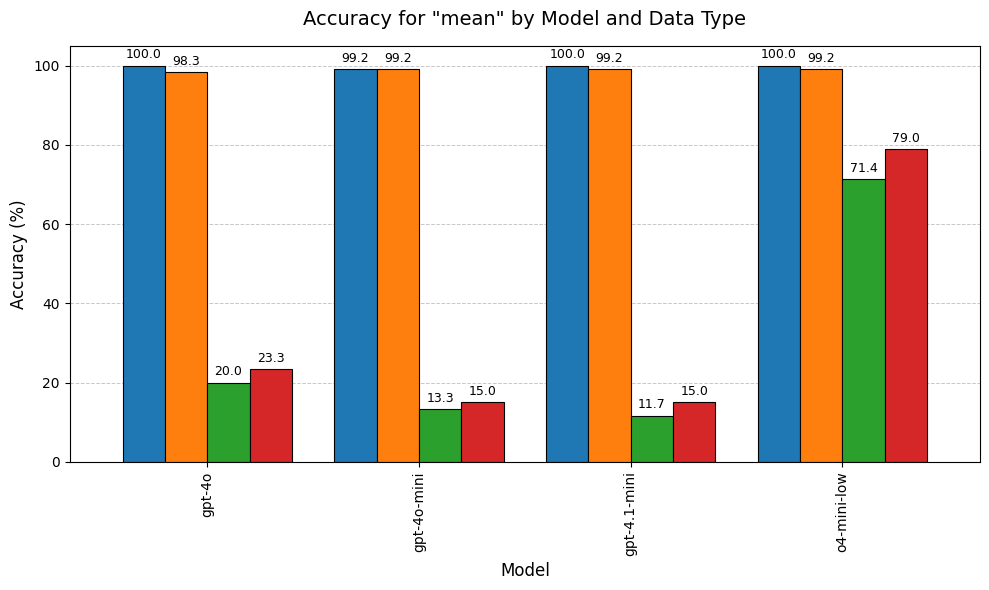

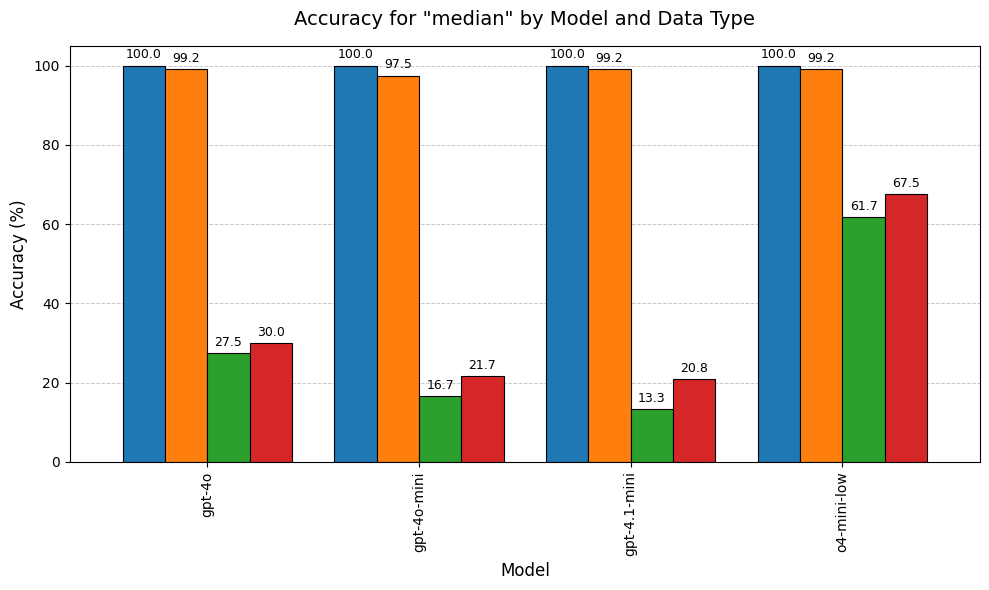

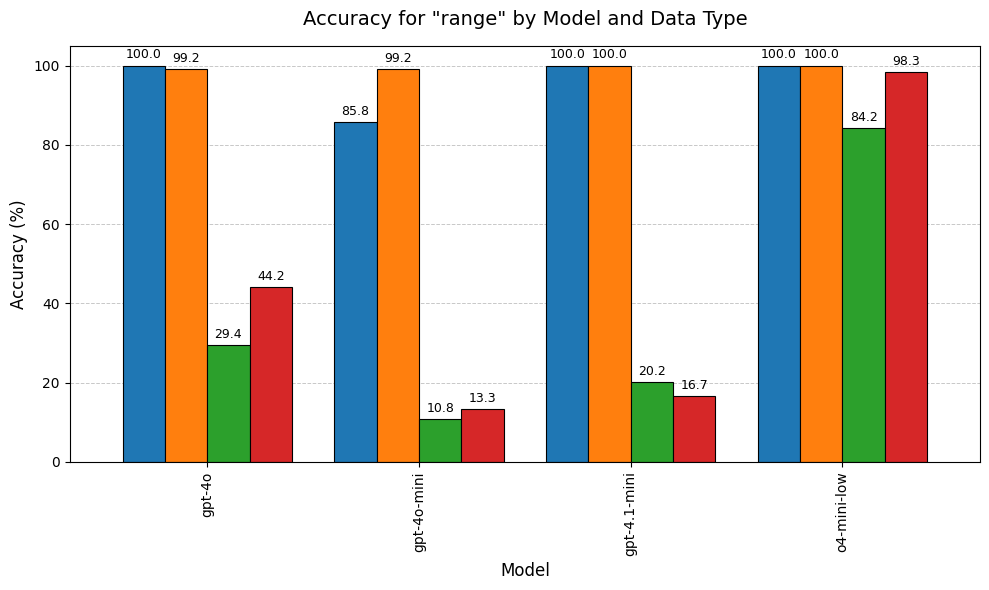

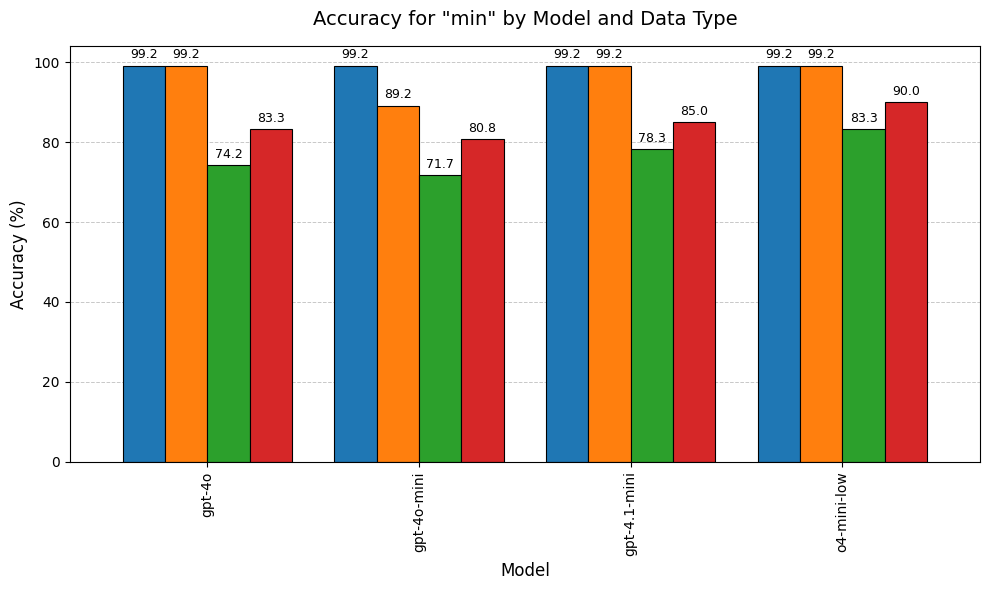

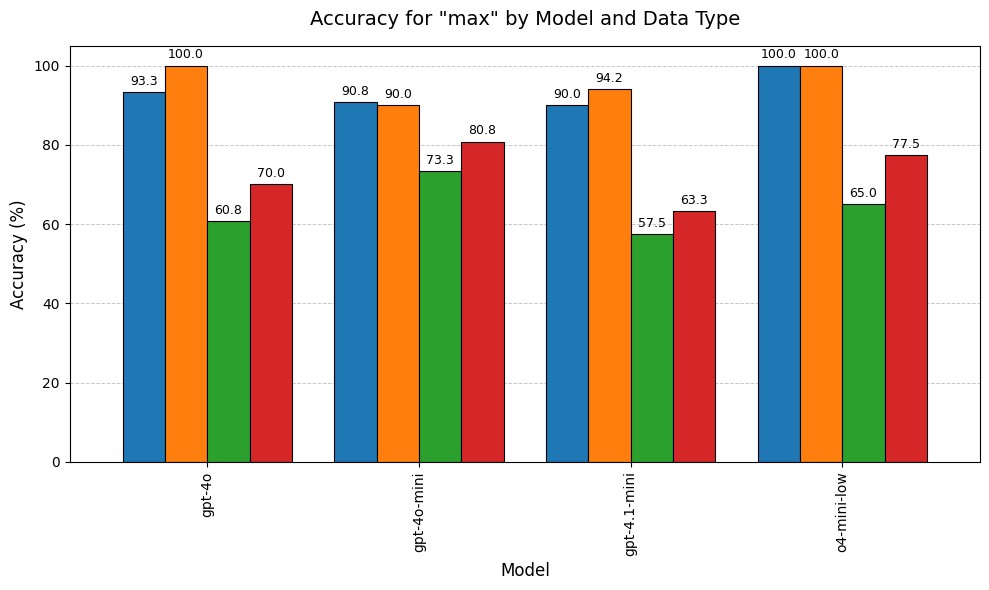

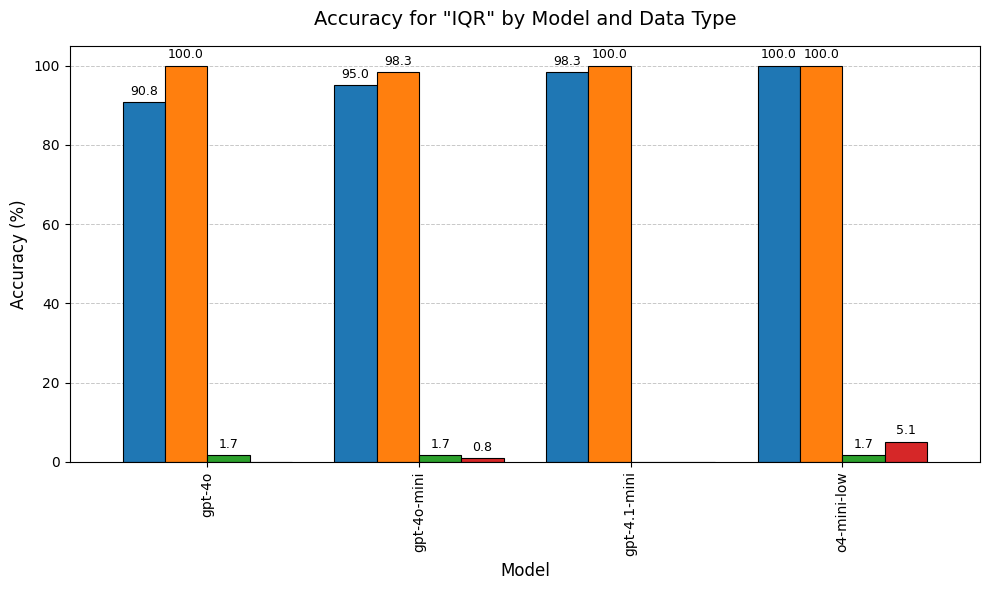

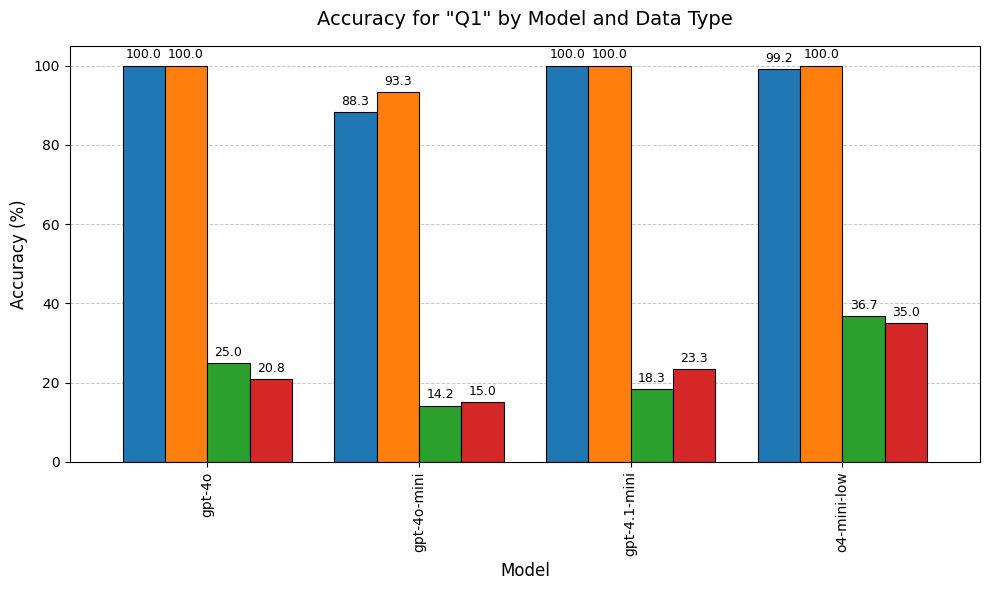

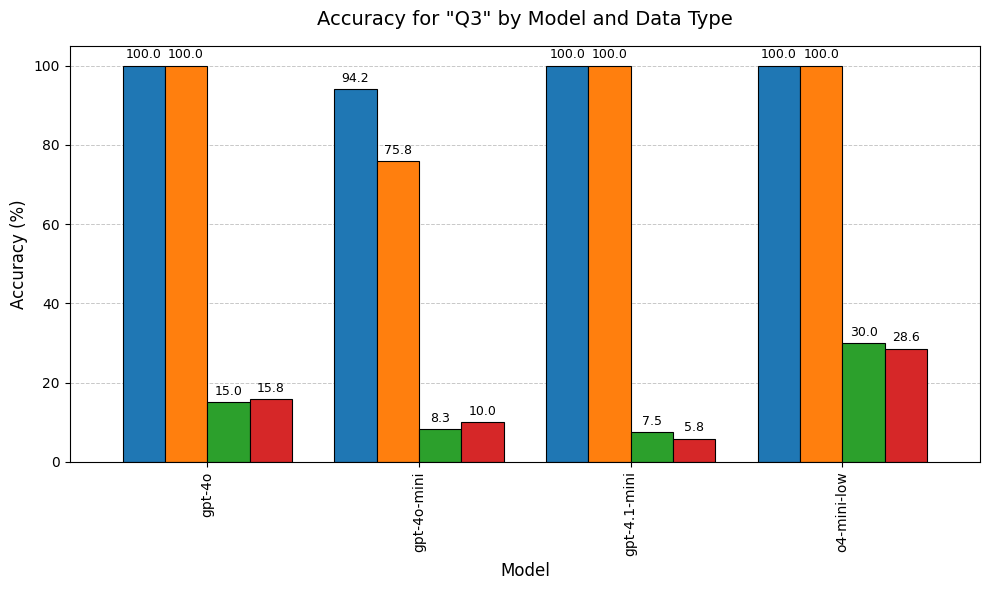

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define full set of models, data types, and metrics
models = ["gpt-4o", "gpt-4o-mini", "gpt-4.1-mini", "o4-mini-low"]
data_types = ["Processed/Table", "Processed/Embeded", "Raw/Table", "Raw/Embedded"]
metrics = ["mean", "median", "range", "min", "max", "IQR", "Q1", "Q3"]

# 2. Load data (adjust path if needed)
df = pd.read_csv('../experiments.csv')  # update to your filepath

# 3. Drop rows with empty responses
df = df[df['response'].notna() & (df['response'] != '')]

# 4. Cast to numeric and drop NaNs
df['response']         = pd.to_numeric(df['response'], errors='coerce')
df['ground_truth']     = pd.to_numeric(df['ground_truth'], errors='coerce')
df = df.dropna(subset=['response', 'ground_truth'])

# 5. Compute accuracy flag (within 1%)
df['correct'] = (abs(df['response'] - df['ground_truth']) / df['ground_truth']) <= 0.01

# 6. Loop over each metric and plot
for metric in metrics:
    # 6a. Filter to this metric
    sub = df[df['Statistical_Metric'] == metric]
    
    # 6b. Pivot average accuracy (%) by Model × Data_Type, filling missing with 0
    acc = (
        sub.groupby(['Model', 'Data_Type'])['correct']
           .mean()
           .unstack(fill_value=0)
           .reindex(index=models, columns=data_types, fill_value=0)
        * 100
    )
    
    # 7. Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    acc.plot(
        kind='bar',
        edgecolor='black',
        linewidth=0.8,
        width=0.8,
        ax=ax,
        legend=False   # no legend, identical look
    )
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel('Accuracy (%)', fontsize=12)
    ax.set_title(f'Accuracy for "{metric}" by Model and Data Type', fontsize=14, pad=15)
    ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
    ax.set_axisbelow(True)
    
    # Annotate each bar with its value
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(
                f'{h:.1f}',
                (p.get_x() + p.get_width() / 2, h),
                ha='center', va='bottom',
                fontsize=9,
                xytext=(0, 3), textcoords='offset points'
            )
    
    plt.tight_layout()
    plt.show()


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define full set of models, data types, and metrics
models = ["gpt-4o", "gpt-4o-mini", "gpt-4.1-mini", "o4-mini-low"]
data_types = ["Processed/Table", "Processed/Embeded", "Raw/Table", "Raw/Embedded"]
metrics = ["mean", "median", "range", "min", "max", "IQR", "Q1", "Q3"]

# 2. Load data (adjust path if needed)
df = pd.read_csv('../experiments.csv')  # update to your filepath

# 3. Drop rows with empty responses
df = df[df['response'].notna() & (df['response'] != '')]

# 4. Cast to numeric and drop NaNs
df['response']     = pd.to_numeric(df['response'], errors='coerce')
df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
df = df.dropna(subset=['response', 'ground_truth'])

# 5. Compute accuracy flag (within 1%)
df['correct'] = (abs(df['response'] - df['ground_truth']) / df['ground_truth']) <= 0.01

raw_types = ["Raw/Table", "Raw/Embedded"]

# 1. Filter to raw data
raw_df = df[df['Data_Type'].isin(raw_types)]

# 2. Build pivot: index=(Model, Data_Type), columns=Statistical_Metric, values=mean(correct)*100
raw_acc = (
    raw_df
      .groupby(['Model', 'Data_Type', 'Statistical_Metric'])['correct']
      .mean()
      .unstack('Statistical_Metric')
      .reindex(
         index=pd.MultiIndex.from_product([models, raw_types],
                                          names=['Model','Data_Type']),
         columns=metrics
      )
      .fillna(0)  # if you want to fill any missing combos with 0%
    * 100
)

# 3. (Optional) flatten the MultiIndex into a single label
raw_acc.index = [f"{m} / {dt}" for m, dt in raw_acc.index]

# 4. Print as Markdown for nice console formatting
print("\nAccuracy (%) for RAW data:\n")
print(raw_acc.to_markdown())


raw_acc_T = raw_acc.T

# 2. Print as Markdown
print("\nAccuracy (%) for RAW data (metrics × models/data types):\n")
print(raw_acc_T.to_markdown())




Accuracy (%) for RAW data:

|                             |    mean |   median |   range |     min |     max |      IQR |      Q1 |       Q3 |
|:----------------------------|--------:|---------:|--------:|--------:|--------:|---------:|--------:|---------:|
| gpt-4o / Raw/Table          | 20      |  27.5    | 29.4118 | 74.1667 | 60.8333 | 1.66667  | 25      | 15       |
| gpt-4o / Raw/Embedded       | 23.3333 |  30      | 44.1667 | 83.3333 | 70      | 0        | 20.8333 | 15.8333  |
| gpt-4o-mini / Raw/Table     | 13.3333 |  16.6667 | 10.8333 | 71.6667 | 73.3333 | 1.66667  | 14.1667 |  8.33333 |
| gpt-4o-mini / Raw/Embedded  | 15      |  21.6667 | 13.3333 | 80.8333 | 80.8333 | 0.833333 | 15      | 10       |
| gpt-4.1-mini / Raw/Table    | 11.6667 |  13.3333 | 20.1681 | 78.3333 | 57.5    | 0        | 18.3333 |  7.5     |
| gpt-4.1-mini / Raw/Embedded | 15      |  20.8333 | 16.6667 | 85      | 63.3333 | 0        | 23.3333 |  5.83333 |
| o4-mini-low / Raw/Table     | 71.4286 |  61.6667 

In [23]:
#!/usr/bin/env python3
import pandas as pd

def make_accuracy_table(
    csv_path: str,
    output_tex: str = "accuracy_table_collapsed.tex"
):
    """
    Reads experiments.csv, computes mean accuracy (%) within 1% for each
    (metric, model, data_type), collapses PT/PE into 'Processed' and RT/RE 
    into 'Raw', and writes a LaTeX table wrapped in \resizebox, with Raw
    appearing before Processed for each model.
    """
    # 0) Definitions
    models     = ["gpt-4o", "gpt-4o-mini", "gpt-4.1", "gpt-4.1-mini", "o4-mini-low"]
    data_types = ["Processed/Table", "Processed/Embeded", "Raw/Table", "Raw/Embedded"]
    metrics    = ["mean", "median", "range", "min", "max", "IQR", "Q1", "Q3"]
    code_map   = {
        "Processed/Table":   "PT",
        "Processed/Embeded": "PE",
        "Raw/Table":         "RT",
        "Raw/Embedded":      "RE",
    }

    # 1) Load & clean
    df = pd.read_csv(csv_path)
    df = df[df['response'].notna() & (df['response'] != '')]
    df['response']     = pd.to_numeric(df['response'],     errors='coerce')
    df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
    df = df.dropna(subset=['response','ground_truth'])
    df['correct'] = ((df['response'] - df['ground_truth']).abs() 
                     / df['ground_truth'] <= 0.01).astype(float)

    # 2) Pivot into two‑level % accuracy
    acc = (
        df
        .pivot_table(
            index="Statistical_Metric",
            columns=["Model","Data_Type"],
            values="correct",
            aggfunc="mean",
            fill_value=0
        )
        .reindex(
            index=metrics,
            columns=pd.MultiIndex.from_product([models, data_types]),
            fill_value=0
        ) * 100
    )

    # 3) Rename codes
    acc.columns = pd.MultiIndex.from_tuples(
        [(model, code_map[dt]) for model, dt in acc.columns],
        names=["Model","Code"]
    )

    # 4) Collapse into Raw / Processed (swap order)
    collapsed = pd.DataFrame(
        index=metrics,
        columns=pd.MultiIndex.from_product([models, ["Raw","Processed"]],
                                          names=["Model","Type"])
    )
    for m in metrics:
        for mdl in models:
            pt = acc.at[m,(mdl,"PT")]
            pe = acc.at[m,(mdl,"PE")]
            rt = acc.at[m,(mdl,"RT")]
            re = acc.at[m,(mdl,"RE")]
            collapsed.at[m,(mdl,"Raw")]       = f"{rt:.1f} / {re:.1f}"
            collapsed.at[m,(mdl,"Processed")] = f"{pt:.1f} / {pe:.1f}"

    # 5) Write LaTeX with \resizebox
    with open(output_tex, "w") as f:
        w = lambda s="": f.write(s + "\n")

        w(r"\begin{table}[h]")
        w(r"  \centering")
        w(r"  \resizebox{\textwidth}{!}{%")
        # tabular: one 'l' for Metric, then 2 cols per model
        col_fmt = "l " + " c" * (len(models)*2)
        w(f"    \\begin{{tabular}}{{{col_fmt}}}")
        w(r"      \toprule")

        # First header row
        first = "Metric "
        for mdl in models:
            first += f"& \\multicolumn{{2}}{{c}}{{{mdl}}} "
        w("      " + first + r"\\")

        # cmidrules
        cmids = []
        for i in range(len(models)):
            start, end = 2+2*i, 2+2*i+1
            cmids.append(f"\\cmidrule(lr){{{start}-{end}}}")
        w("      " + "".join(cmids))

        # Second header row: Raw then Processed
        second = ""
        for _ in models:
            second += "& Raw & Processed "
        w("      " + second + r"\\")

        w(r"      \midrule")
        # Data rows
        for m in metrics:
            row = m + " "
            for mdl in models:
                raw   = collapsed.at[m,(mdl,"Raw")]
                proc  = collapsed.at[m,(mdl,"Processed")]
                row += f"& {raw} & {proc} "
            w("      " + row + r"\\")

        w(r"      \bottomrule")
        w(r"    \end{tabular}%")
        w(r"  }")   # end \resizebox
        w(r"  \caption{Accuracy (\%) within 1\% of ground truth. "
          r"Cells show Raw = RT/RE and Processed = PT/PE as “x.x / y.y”.}")
        w(r"  \label{tab:accuracy_collapsed}")
        w(r"\end{table}")

    print(f"→ Wrote LaTeX table to {output_tex}")

if __name__ == "__main__":
    make_accuracy_table("../experiments.csv")


→ Wrote LaTeX table to accuracy_table_collapsed.tex


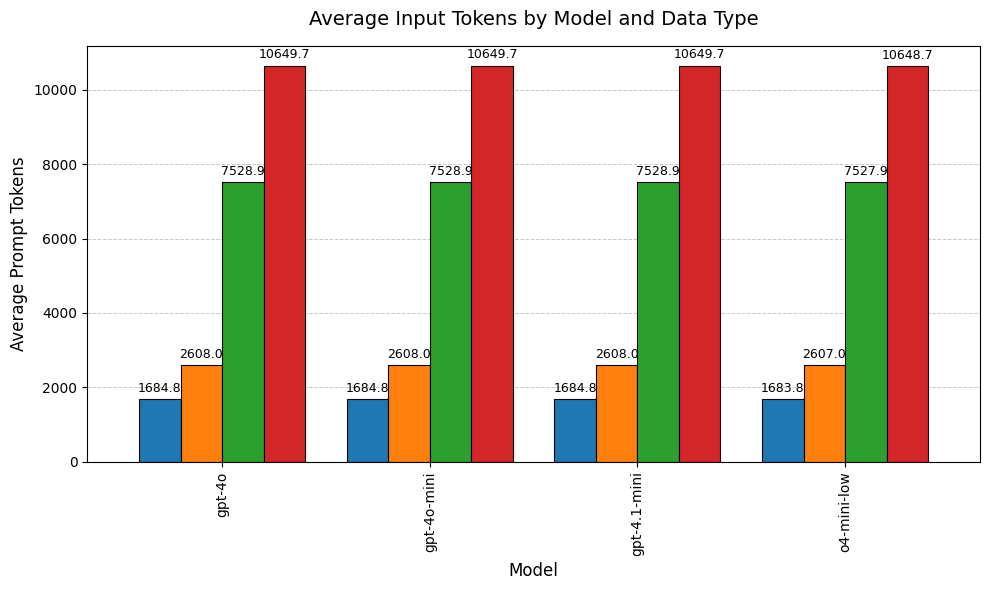

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define full set of models and data types
models = ["gpt-4o", "gpt-4o-mini", "gpt-4.1-mini", "o4-mini-low"]
data_types = ["Processed/Table", "Processed/Embeded", "Raw/Table", "Raw/Embedded"]

# 2. Load data (adjust path if needed)
df = pd.read_csv('../experiments.csv')  # update to your filepath

# 3. Drop rows with empty 'response' (so we stay consistent with the rest)
df = df[df['response'].notna() & (df['response'] != '')]

# 4. Cast prompt_tokens to numeric and drop any NaNs
df['prompt_tokens'] = pd.to_numeric(df['prompt_tokens'], errors='coerce')
df = df.dropna(subset=['prompt_tokens'])

# 5. Pivot average prompt_tokens by Model × Data_Type
inp = (
    df.groupby(['Model', 'Data_Type'])['prompt_tokens']
      .mean()
      .unstack(fill_value=0)
      .reindex(index=models, columns=data_types, fill_value=0)
)

# 6. Plot grouped bar chart for input tokens
fig, ax = plt.subplots(figsize=(10, 6))
inp.plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.8,
    width=0.8,
    legend=False,
    ax=ax
)

# Styling
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Average Prompt Tokens', fontsize=12)
ax.set_title('Average Input Tokens by Model and Data Type', fontsize=14, pad=15)
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)
# ax.legend(title='Data Type', loc='upper left', frameon=True)

# Annotate each bar with its value
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(
            f'{h:.1f}',
            (p.get_x() + p.get_width() / 2, h),
            ha='center', va='bottom',
            fontsize=9,
            xytext=(0, 3), textcoords='offset points'
        )

plt.tight_layout()
plt.show()


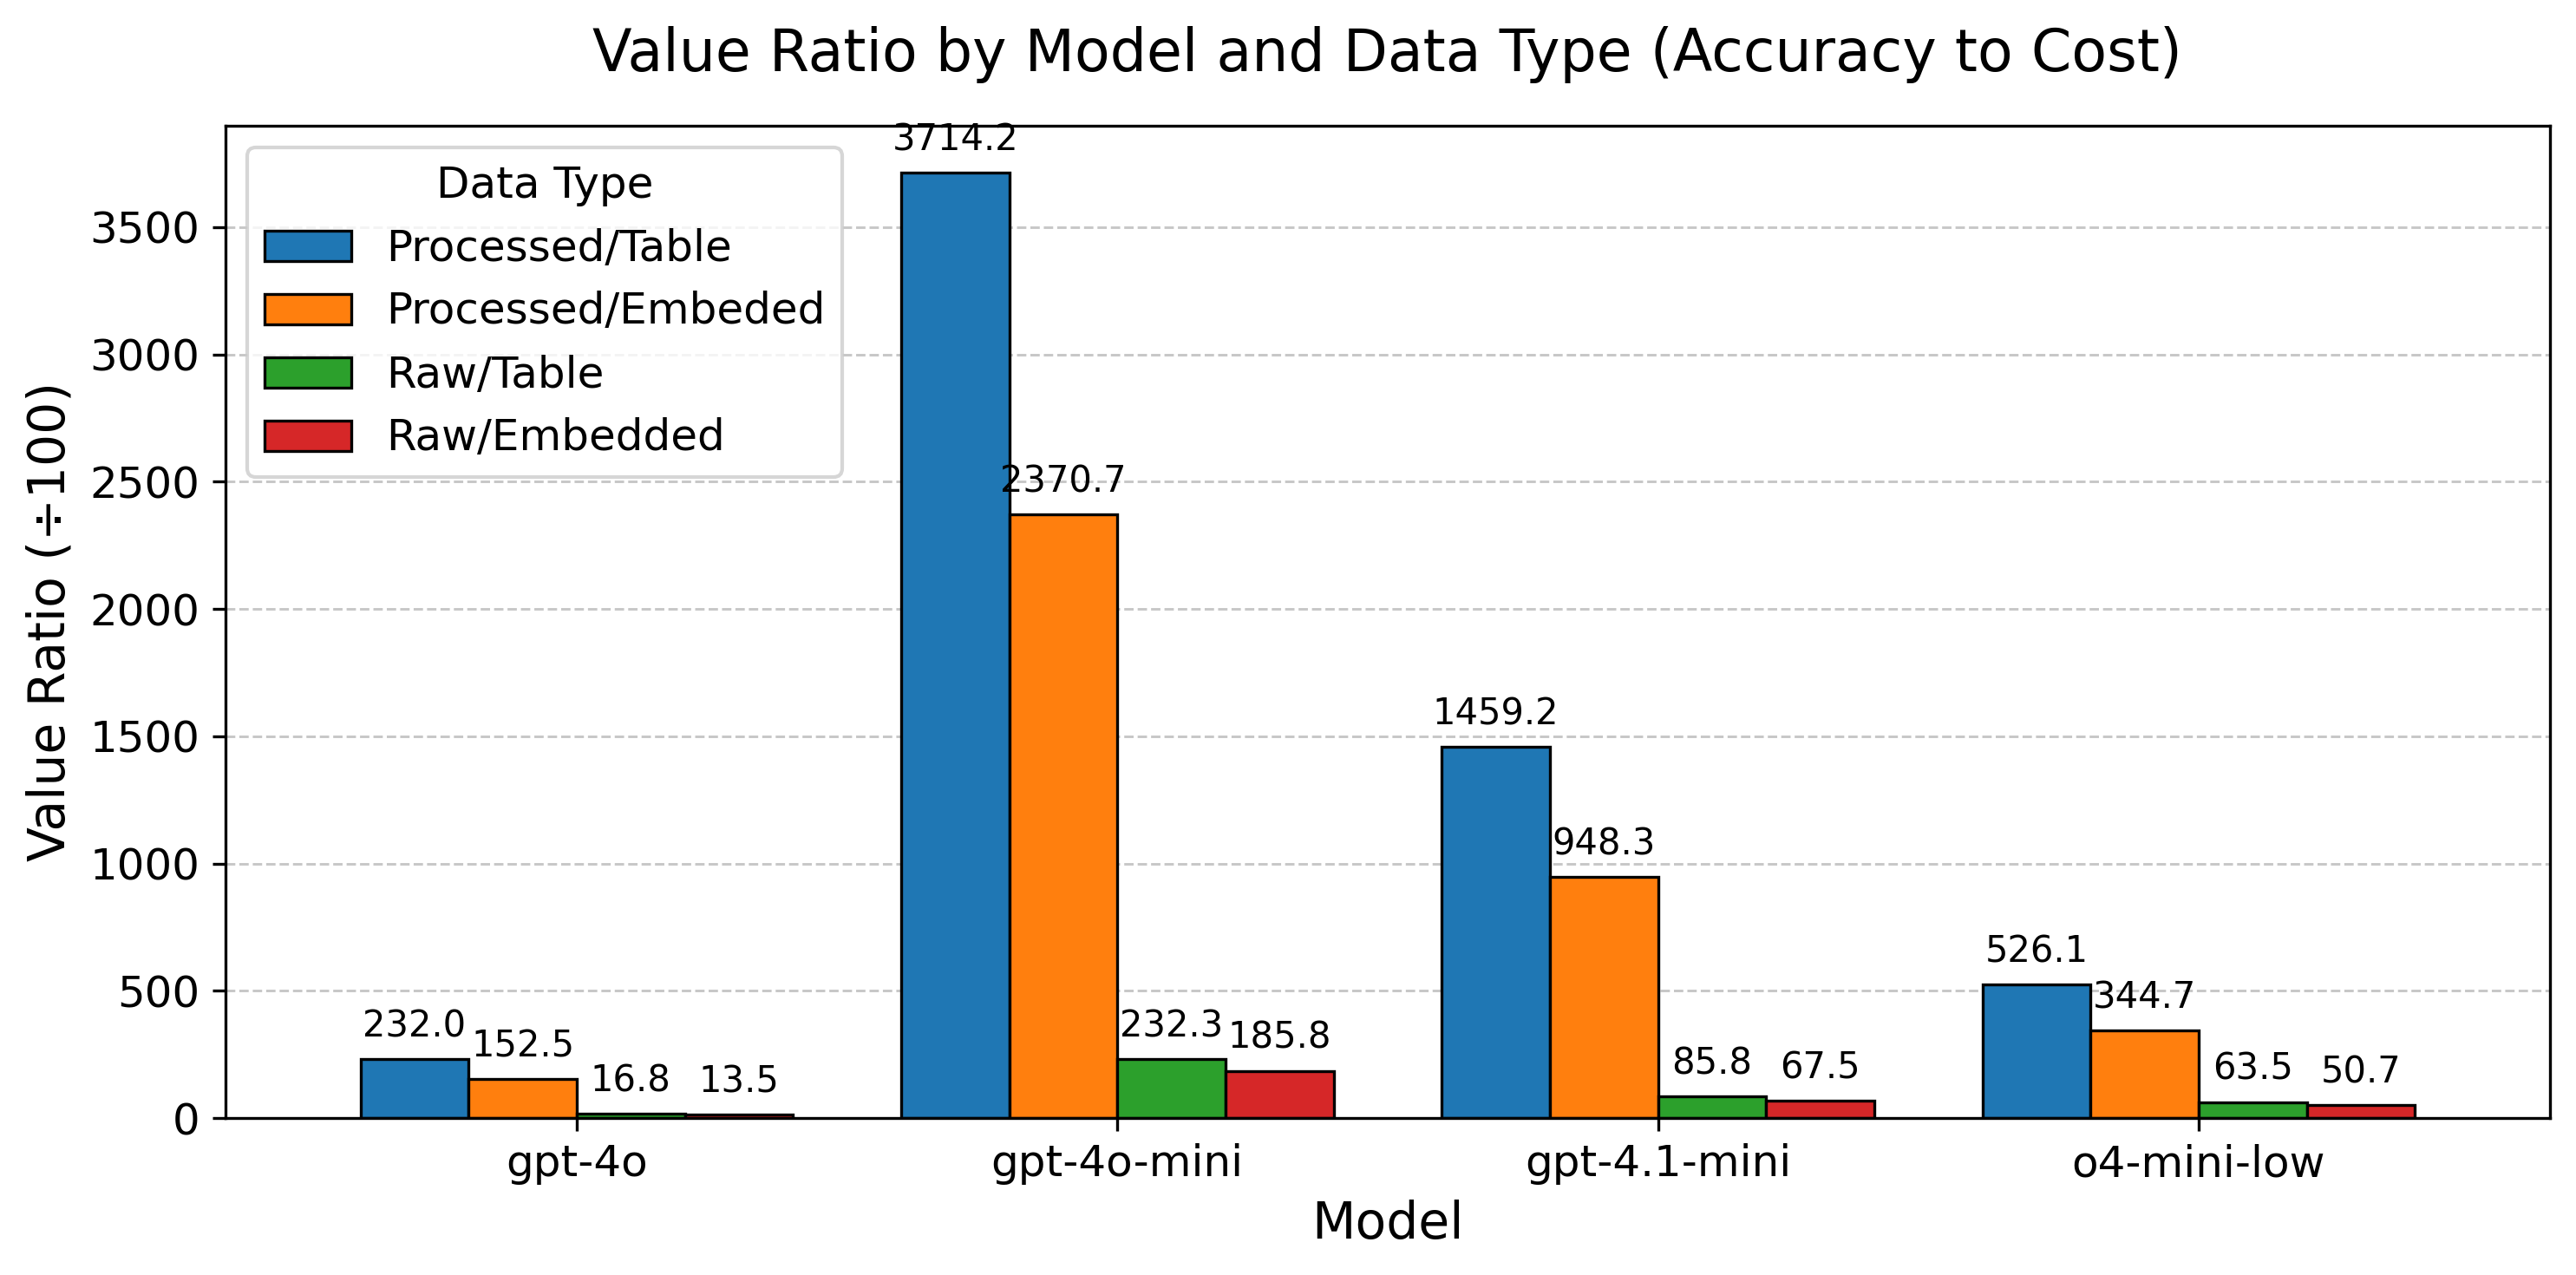

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define full set of models and data types
models = ["gpt-4o", "gpt-4o-mini", "gpt-4.1-mini", "o4-mini-low"]
data_types = ["Processed/Table", "Processed/Embeded", "Raw/Table", "Raw/Embedded"]

# 2. Pricing table ($ per 1 000 000 tokens)
pricing = {
    "gpt-4.1":                    {"in":   2.00,  "out":   0.50},
    "gpt-4.1-mini":               {"in":   0.40,  "out":   0.10},
    "gpt-4.1-nano":               {"in":   0.10,  "out":   0.025},
    "gpt-4.5-preview":            {"in":  75.00,  "out":  37.50},
    "gpt-4o":                     {"in":   2.50,  "out":   1.25},
    "gpt-4o-audio-preview":       {"in":   2.50,  "out":   0.00},
    "gpt-4o-realtime-preview":    {"in":   5.00,  "out":   2.50},
    "gpt-4o-mini":                {"in":   0.15,  "out":   0.075},
    "gpt-4o-mini-audio-preview":  {"in":   0.15,  "out":   0.00},
    "gpt-4o-mini-realtime-preview":{"in":  0.60,  "out":   0.30},
    "o1":                         {"in":  15.00,  "out":   7.50},
    "o1-pro":                     {"in": 150.00,  "out":   0.00},
    "o3":                         {"in":  10.00,  "out":   2.50},
    "o4-mini":                    {"in":   1.10,  "out":   0.275},
    "o4-mini-low":                {"in":   1.10,  "out":   0.275},
    "o3-mini":                    {"in":   1.10,  "out":   0.55},
    "o1-mini":                    {"in":   1.10,  "out":   0.55},
    "gpt-4o-mini-search-preview": {"in":   0.15,  "out":   0.00},
    "gpt-4o-search-preview":      {"in":   2.50,  "out":   0.00},
    "computer-use-preview":       {"in":   3.00,  "out":   0.00},
    "gpt-image-1":                {"in":   5.00,  "out":   0.00},
}

# 3. Load data
df = pd.read_csv('../experiments.csv')

# 4. Clean & cast numeric
df = df[df['response'].notna() & (df['response'] != '')]
df['response']         = pd.to_numeric(df['response'], errors='coerce')
df['ground_truth']     = pd.to_numeric(df['ground_truth'], errors='coerce')
df['prompt_tokens']    = pd.to_numeric(df['prompt_tokens'], errors='coerce')
df['completion_tokens']= pd.to_numeric(df['completion_tokens'], errors='coerce')
df['compute_time']     = pd.to_numeric(df['compute_time'], errors='coerce')
df = df.dropna(subset=['response','ground_truth','prompt_tokens','completion_tokens'])

# 5. Compute accuracy flag
df['correct'] = (abs(df['response'] - df['ground_truth']) / df['ground_truth']) <= 0.01

# 6. Map rates & compute cost
df['in_rate']  = df['Model'].map(lambda m: pricing.get(m, {}).get('in',  0.0))
df['out_rate'] = df['Model'].map(lambda m: pricing.get(m, {}).get('out', 0.0))
df['cost'] = (df['prompt_tokens']     / 1_000_000) * df['in_rate'] + \
             (df['completion_tokens'] / 1_000_000) * df['out_rate']

# 7a. Pivot average accuracy (%) by Model × Data_Type
acc_pivot = (
    df.groupby(['Model','Data_Type'])['correct']
      .mean()
      .unstack(fill_value=0)
      .reindex(index=models, columns=data_types, fill_value=0)
    * 100
)

# 7b. Pivot average cost by Model × Data_Type
cost_pivot = (
    df.groupby(['Model','Data_Type'])['cost']
      .mean()
      .unstack(fill_value=0)
      .reindex(index=models, columns=data_types, fill_value=0)
)

# 8. Compute value ratio pivot (accuracy ÷ cost), handle zeros, then divide by 100
value_pivot = acc_pivot.divide(cost_pivot.replace(0, pd.NA))
value_pivot = (
    value_pivot
    .replace([pd.NA, float('inf'), float('-inf')], 0)
    .astype(float)
    / 100
)

# 9. Plot grouped bar chart of value ratio at 300 dpi with larger font
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)  # set dpi here
value_pivot.plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.8,
    width=0.8,
    ax=ax
)

# Styling with larger fonts
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Value Ratio (÷100)', fontsize=14)
ax.set_title('Value Ratio by Model and Data Type (Accuracy to Cost)', fontsize=16, pad=15)
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)
ax.legend(title='Data Type', loc='upper left', frameon=True, fontsize=12, title_fontsize=12)

# Make x-axis tick labels horizontal and bigger
ax.tick_params(axis='x', rotation=0, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Annotate each bar with its value (one decimal place) in bigger font
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(
            f'{h:.1f}',
            (p.get_x() + p.get_width() / 2, h),
            ha='center', va='bottom',
            fontsize=10,
            xytext=(0, 4), textcoords='offset points'
        )

plt.tight_layout()
plt.show()


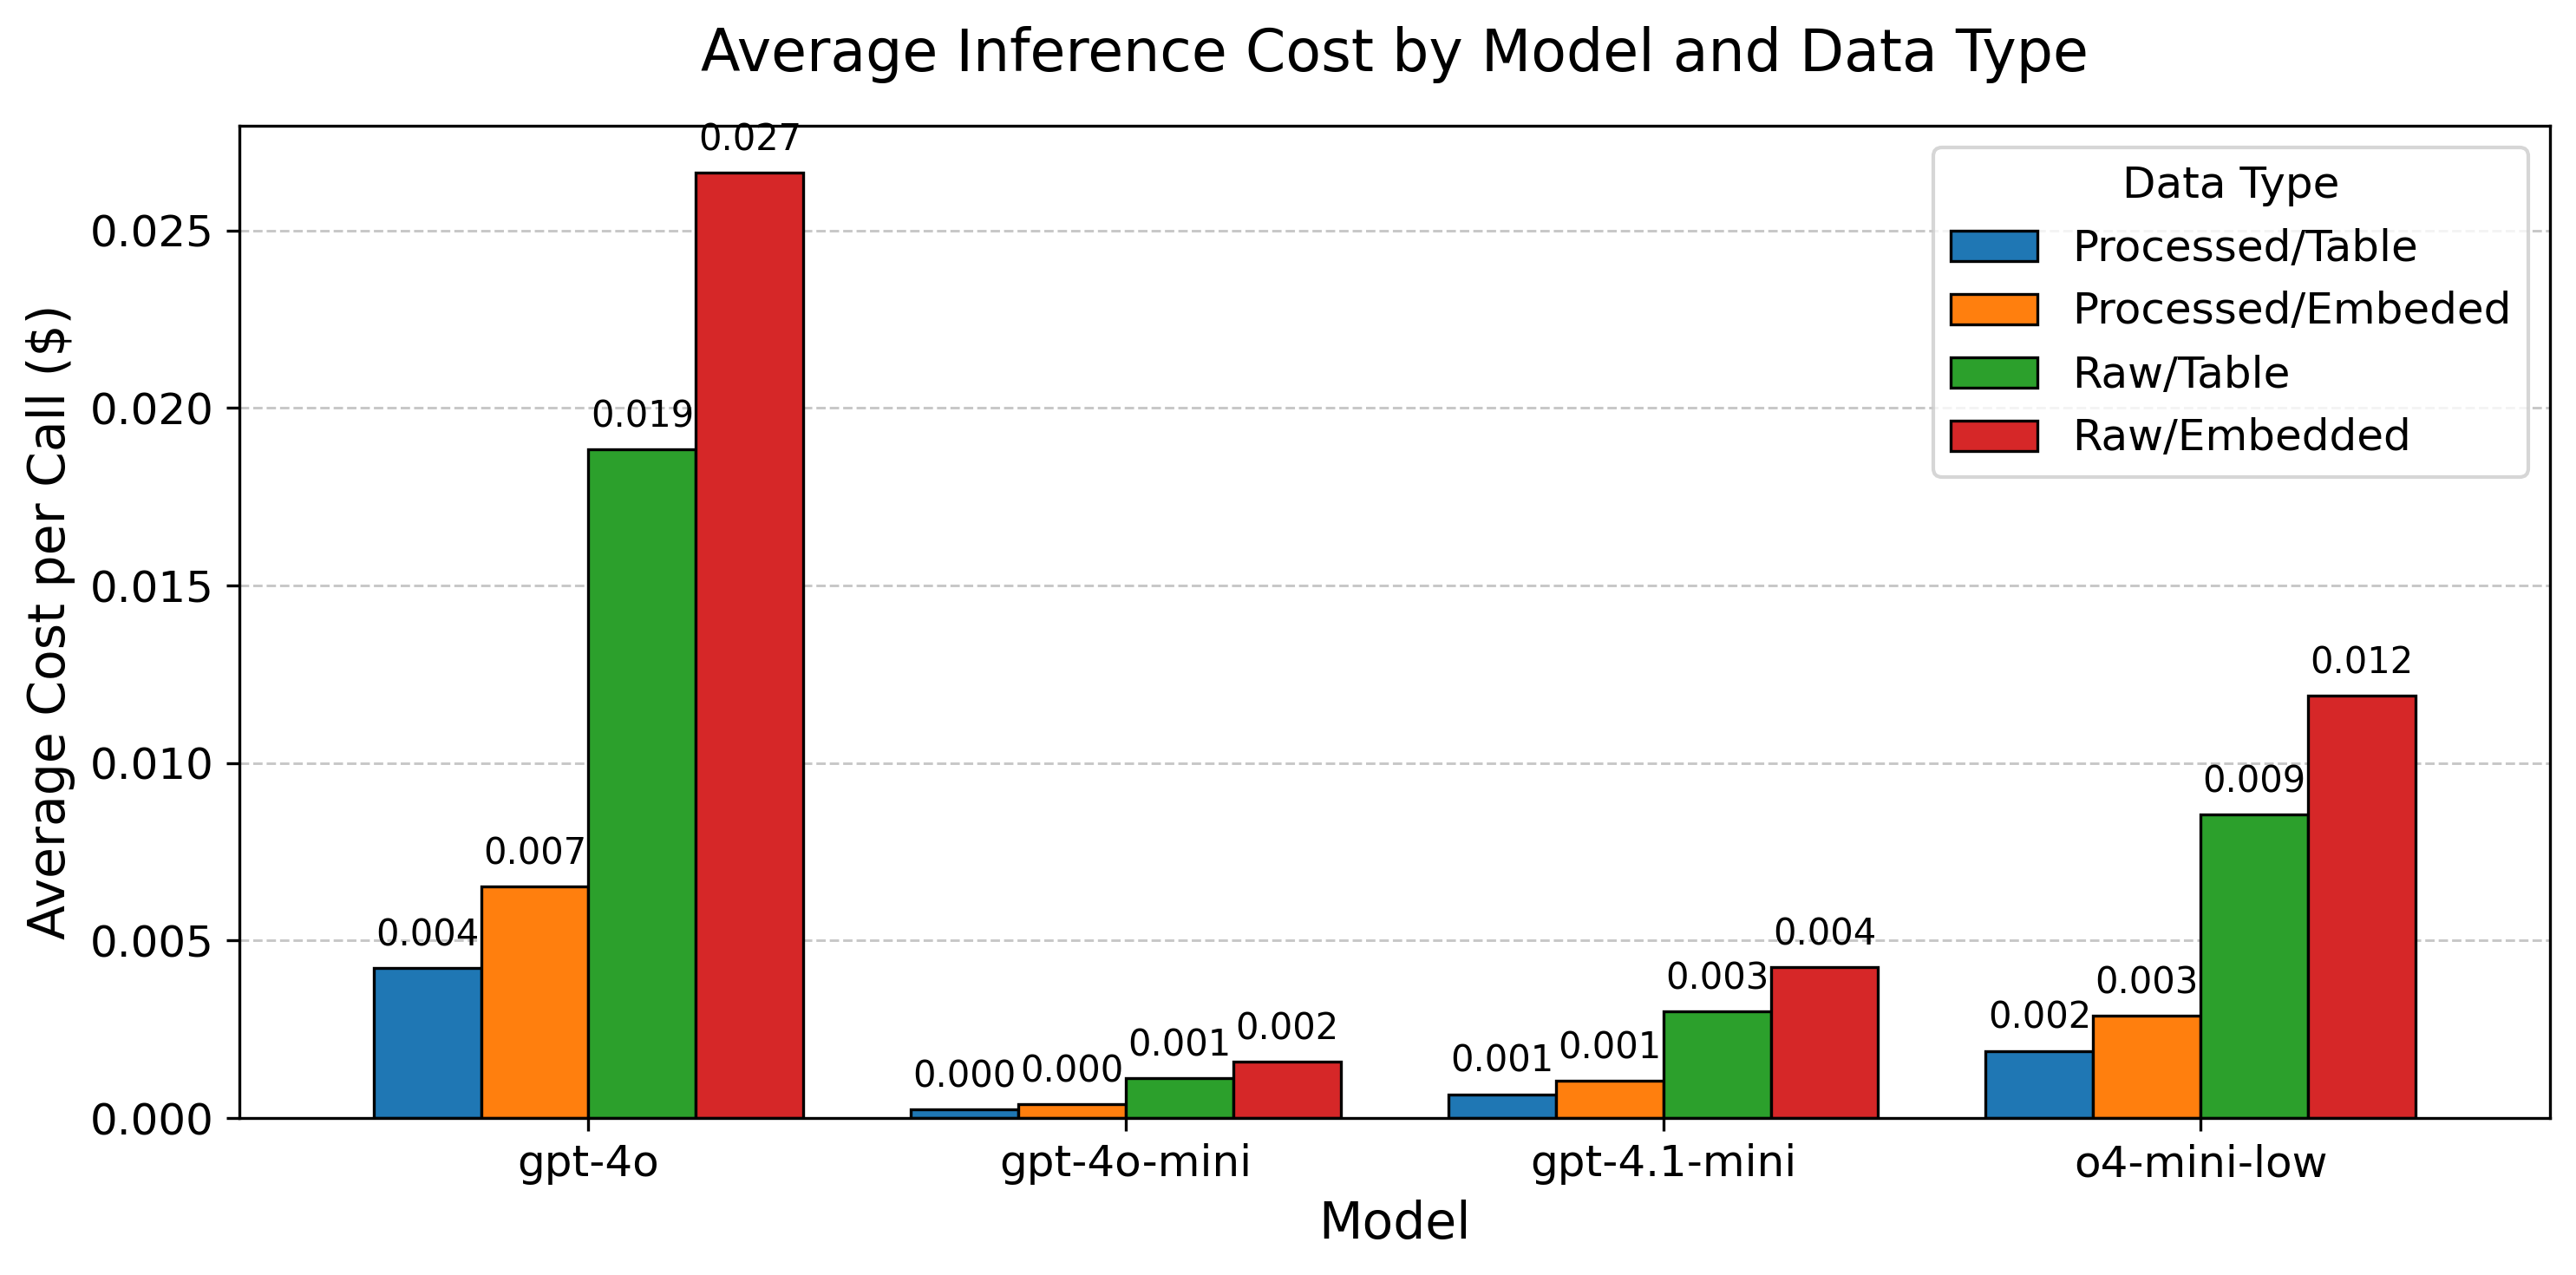

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define full set of models and data types
models = ["gpt-4o", "gpt-4o-mini", "gpt-4.1-mini", "o4-mini-low"]
data_types = ["Processed/Table", "Processed/Embeded", "Raw/Table", "Raw/Embedded"]

# 2. Pricing table ($ per 1 000 000 tokens)
pricing = {
    "gpt-4.1":                    {"in":   2.00,  "out":   0.50},
    "gpt-4.1-mini":               {"in":   0.40,  "out":   0.10},
    "gpt-4.1-nano":               {"in":   0.10,  "out":   0.025},
    "gpt-4.5-preview":            {"in":  75.00,  "out":  37.50},
    "gpt-4o":                     {"in":   2.50,  "out":   1.25},
    "gpt-4o-audio-preview":       {"in":   2.50,  "out":   0.00},
    "gpt-4o-realtime-preview":    {"in":   5.00,  "out":   2.50},
    "gpt-4o-mini":                {"in":   0.15,  "out":   0.075},
    "gpt-4o-mini-audio-preview":  {"in":   0.15,  "out":   0.00},
    "gpt-4o-mini-realtime-preview":{"in":  0.60,  "out":   0.30},
    "o1":                         {"in":  15.00,  "out":   7.50},
    "o1-pro":                     {"in": 150.00,  "out":   0.00},
    "o3":                         {"in":  10.00,  "out":   2.50},
    "o4-mini":                    {"in":   1.10,  "out":   0.275},
    "o4-mini-low":                {"in":   1.10,  "out":   0.275},
    "o3-mini":                    {"in":   1.10,  "out":   0.55},
    "o1-mini":                    {"in":   1.10,  "out":   0.55},
    "gpt-4o-mini-search-preview": {"in":   0.15,  "out":   0.00},
    "gpt-4o-search-preview":      {"in":   2.50,  "out":   0.00},
    "computer-use-preview":       {"in":   3.00,  "out":   0.00},
    "gpt-image-1":                {"in":   5.00,  "out":   0.00},
}

# 3. Load data
df = pd.read_csv('../experiments.csv')

# 4. Ensure token columns are numeric and drop any missing
df['prompt_tokens']     = pd.to_numeric(df['prompt_tokens'], errors='coerce')
df['completion_tokens'] = pd.to_numeric(df['completion_tokens'], errors='coerce')
df = df.dropna(subset=['prompt_tokens','completion_tokens'])

# 5. Map rates onto each row (default 0 if model not in pricing)
df['in_rate']  = df['Model'].map(lambda m: pricing.get(m, {}).get('in', 0.0))
df['out_rate'] = df['Model'].map(lambda m: pricing.get(m, {}).get('out', 0.0))

# 6. Compute cost per call ($ = rate_per_million * tokens/1e6)
df['cost'] = (df['prompt_tokens']     / 1_000_000) * df['in_rate'] + \
             (df['completion_tokens'] / 1_000_000) * df['out_rate']

# 7. Pivot average cost by Model × Data_Type
cost_pivot = (
    df.groupby(['Model','Data_Type'])['cost']
      .mean()
      .unstack(fill_value=0)
      .reindex(index=models, columns=data_types, fill_value=0)
)

# 8. Plot grouped bar chart with larger fonts and horizontal labels
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
cost_pivot.plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.8,
    width=0.8,
    ax=ax
)

# Styling with larger fonts
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Average Cost per Call ($)', fontsize=14)
ax.set_title('Average Inference Cost by Model and Data Type', fontsize=16, pad=15)
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)
ax.legend(title='Data Type', frameon=True, fontsize=12, title_fontsize=12)

# Make x-axis tick labels horizontal and bigger
ax.tick_params(axis='x', rotation=0, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Annotate each bar with its value (three decimals) in bigger font
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(
            f'{h:.3f}',
            (p.get_x() + p.get_width() / 2, h),
            ha='center', va='bottom',
            fontsize=10,
            xytext=(0, 4), textcoords='offset points'
        )

plt.tight_layout()
plt.show()


/var/folders/ps/q4h47zmj6tl1vpklrcy_wr340000gq/T/ipykernel_19245/3119561828.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.sqrt(((g['response'] - g['ground_truth']) ** 2).mean()))


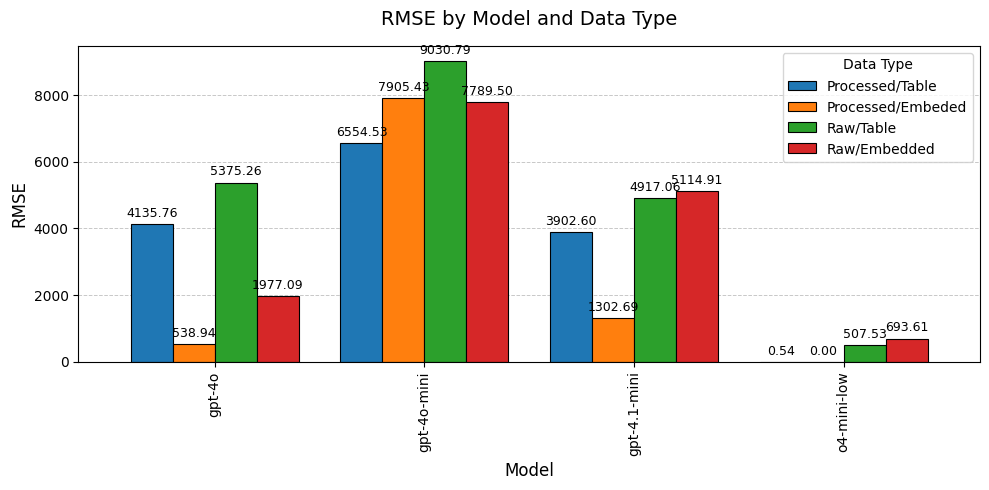

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Models and data types
models = ["gpt-4o", "gpt-4o-mini", "gpt-4.1-mini", "o4-mini-low"]
data_types = ["Processed/Table", "Processed/Embeded", "Raw/Table", "Raw/Embedded"]

# 2. Load data
df = pd.read_csv('../experiments.csv')  # adjust as needed

# 3. Drop empty responses
df = df[df['response'].notna() & (df['response'] != '')]

# 4. Cast to numeric
df['response']         = pd.to_numeric(df['response'], errors='coerce')
df['ground_truth']     = pd.to_numeric(df['ground_truth'], errors='coerce')
df = df.dropna(subset=['response', 'ground_truth'])

# 5. Compute RMSE per Model × Data_Type
rmse = (
    df.groupby(['Model', 'Data_Type'])
      .apply(lambda g: np.sqrt(((g['response'] - g['ground_truth']) ** 2).mean()))
      .unstack(fill_value=0)
      .reindex(index=models, columns=data_types, fill_value=0)
)

# 6. Plot grouped bar chart for RMSE
fig, ax = plt.subplots(figsize=(10, 5))
rmse.plot(
    kind='bar',
    edgecolor='black',
    linewidth=0.8,
    width=0.8,
    legend=False,
    ax=ax
)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('RMSE', fontsize=12)
ax.set_title('RMSE by Model and Data Type', fontsize=14, pad=15)
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)
ax.legend(title='Data Type', loc='upper right', frameon=True)

# Annotate values on bars
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(
            f'{h:.2f}',
            (p.get_x() + p.get_width() / 2, h),
            ha='center', va='bottom',
            fontsize=9,
            xytext=(0, 3), textcoords='offset points'
        )

plt.tight_layout()
plt.show()
